<a href="https://colab.research.google.com/github/Sravan123123/ml/blob/main/MACHINE_LEARNING_LAB4_21203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Define the data
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Display the dataset
print(df)

      age  income student credit_rating buys_computer
0    <=30    high      no          fair            no
1    <=30    high      no     excellent            no
2   31…40    high      no          fair           yes
3     >40  medium      no          fair           yes
4     >40     low     yes          fair           yes
5     >40     low     yes     excellent            no
6   31…40     low     yes     excellent           yes
7    <=30  medium      no          fair            no
8    <=30     low     yes          fair           yes
9     >40  medium     yes          fair           yes
10   <=30  medium     yes     excellent           yes
11  31…40  medium      no     excellent           yes
12  31…40    high     yes          fair           yes
13    >40  medium      no     excellent            no


In [2]:
import pandas as pd
from math import log2

# Define the dataset
data = pd.DataFrame({
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
})

# Calculate the entropy for the 'buys_computer' feature
def calculate_entropy(data):
    class_counts = data.value_counts(normalize=True)
    entropy = -sum(p * log2(p) for p in class_counts)
    return entropy

entropy_buys_computer = calculate_entropy(data['buys_computer'])
print(f'Entropy of "buys_computer": {entropy_buys_computer:.4f}')

# Calculate the entropy for each feature
feature_entropies = {}
for feature in data.columns[:-1]:  # Exclude the target variable 'buys_computer'
    unique_values = data[feature].unique()
    weighted_entropy = 0
    for value in unique_values:
        subset = data[data[feature] == value]
        entropy = calculate_entropy(subset['buys_computer'])
        weight = len(subset) / len(data)
        weighted_entropy += weight * entropy
    feature_entropies[feature] = weighted_entropy

# Print the entropy for each feature
print('\nEntropy for each feature at the root node:')
for feature, entropy in feature_entropies.items():
    print(f'{feature}: {entropy:.4f}')


Entropy of "buys_computer": 0.9403

Entropy for each feature at the root node:
age: 0.6935
income: 0.9111
student: 0.7042
credit_rating: 0.9371


In [3]:
import pandas as pd
import math

# Load the dataset
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Calculate the entropy of the target variable 'buys_computer' at the root node
total_samples = len(df)
yes_count = len(df[df['buys_computer'] == 'yes'])
no_count = len(df[df['buys_computer'] == 'no'])

entropy_root = 0

if yes_count > 0:
    p_yes = yes_count / total_samples
    entropy_root -= p_yes * math.log2(p_yes)

if no_count > 0:
    p_no = no_count / total_samples
    entropy_root -= p_no * math.log2(p_no)

# Calculate Information Gain for each feature
def calculate_entropy(attribute):
    entropy = 0
    attribute_counts = df.groupby(attribute)['buys_computer'].value_counts()
    total_samples = len(df)

    for value, count in attribute_counts.items():
        value_samples = len(df[df[attribute] == value[0]])
        p_value = value_samples / total_samples
        p_class = count / value_samples
        entropy -= p_value * p_class * math.log2(p_class)

    return entropy

information_gain = {}
for feature in df.columns[:-1]:  # Exclude the target variable
    entropy_feature = calculate_entropy(feature)
    information_gain[feature] = entropy_root - entropy_feature

# Identify the feature with the highest Information Gain as the root node
root_node = max(information_gain, key=information_gain.get)

print("Entropy at root node:", entropy_root)

print("\nInformation Gain for each feature:")
for feature, ig in information_gain.items():
    print(f"{feature}: {ig}")

print("The first feature to select for the decision tree:", root_node)

Entropy at root node: 0.9402859586706311

Information Gain for each feature:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.0481270304082696
The first feature to select for the decision tree: age


In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Separate the features (X) and the target variable (y)
X = df.drop('buys_computer', axis=1)
y = df['buys_computer']

# Perform one-hot encoding on the categorical features
X_encoded = pd.get_dummies(X, columns=['age', 'income', 'student', 'credit_rating'])

# Create and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_encoded, y)

# Get the training set accuracy
training_accuracy = model.score(X_encoded, y)
print("Training Set Accuracy:", training_accuracy)

# Get the depth of the constructed tree
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)

Training Set Accuracy: 1.0
Tree Depth: 4


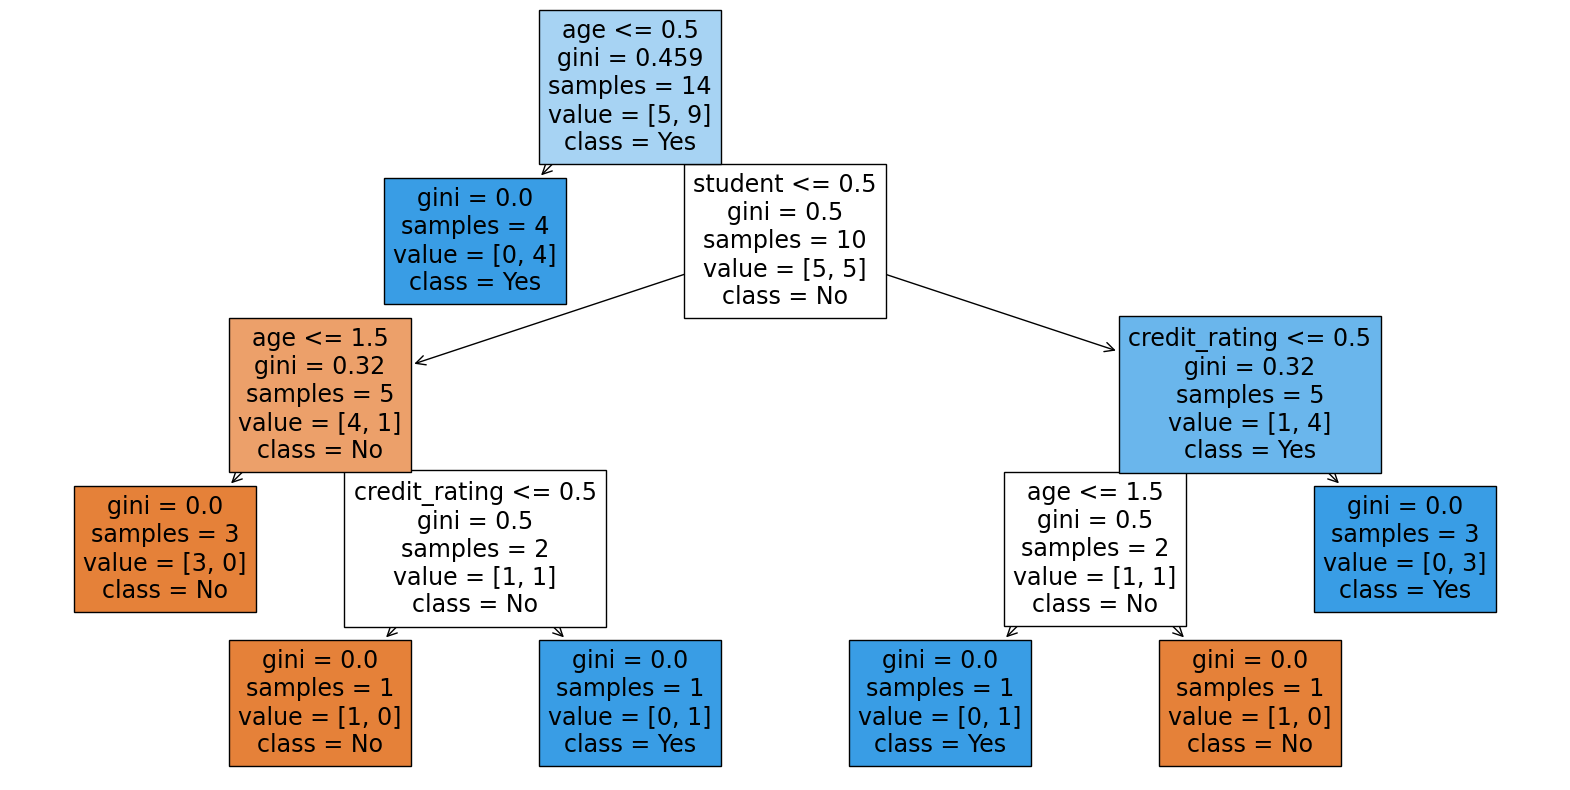

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

# Define the dataset as you provided
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Encode categorical features
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Define features and target variable
X = df.drop('buys_computer', axis=1)
y = df['buys_computer']

# Create and fit the decision tree model
model = DecisionTreeClassifier()
model.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model, filled=True, feature_names=list(df.columns[:-1]), class_names=['No', 'Yes'])
plt.show()


In [10]:
import numpy as np
import pandas as pd
df=pd.read_excel("/content/DS to B.tech.xlsx")
df

#In[8]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Separate features (X) and target (y)
X = df[['', '']]
y = df['Label']

# Split the data into training and test sets (70% training, 30% test)
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(Tr_X, Tr_y)

# Training Set accuracy
train_accuracy = model.score(Tr_X, Tr_y)

# Test Set Accuracy
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy: {train_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")
class_names = df['Label'].unique().astype(str).tolist()
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=['embed_1', 'embed_2'], class_names=class_names)
plt.title("Decision Tree")
plt.show()


KeyError: ignored

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
X = df[['embed_1', 'embed_2']]
y = df['Label']
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier with max_depth constraint
model = DecisionTreeClassifier(max_depth=5)

# Fit the model on the training data
model.fit(Tr_X, Tr_y)

# Training Set accuracy
train_accuracy = model.score(Tr_X, Tr_y)

# Test Set Accuracy
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy: {train_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

# Convert class labels to strings
class_names = df['Label'].unique().astype(str).tolist()

# Plot the Decision Tree with max_depth constraint
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=['embed_1', 'embed_2'], class_names=class_names)
plt.title("Decision Tree with max_depth=5")
plt.show()

KeyError: ignored

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



# Separate features (X) and target (y)
X = df[['embed_1', 'embed_2']]
y = df['Label']

# Split the data into training and test sets (70% training, 30% test)
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier with entropy criterion
model_entropy = DecisionTreeClassifier(criterion="entropy")

# Fit the model on the training data
model_entropy.fit(Tr_X, Tr_y)

# Training Set accuracy with entropy criterion
train_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)

# Test Set Accuracy with entropy criterion
test_accuracy_entropy = model_entropy.score(Te_X, Te_y)

print(f"Training Set Accuracy (Entropy Criterion): {train_accuracy_entropy}")
print(f"Test Set Accuracy (Entropy Criterion): {test_accuracy_entropy}")

# Convert class labels to strings
class_names = df['Label'].unique().astype(str).tolist()


# Plot the Decision Tree with entropy criterion
plt.figure(figsize=(10, 6))
plot_tree(model_entropy, filled=True, feature_names=['embed_1', 'embed_2'], class_names=class_names)
plt.title("Decision Tree with Entropy Criterion")
plt.show()

KeyError: ignored

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Separate features (X) and target (y)
X = df[['', 'embed_2']]
y = df['Label']

# Split the data into training and test sets (70% training, 30% test)
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a single Decision Tree classifier
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(Tr_X, Tr_y)

# Predict using the Decision Tree model
y_pred_decision_tree = model_decision_tree.predict(Te_X)

# Calculate accuracy and print metrics for the Decision Tree
accuracy_decision_tree = accuracy_score(Te_y, y_pred_decision_tree)
confusion_matrix_decision_tree = confusion_matrix(Te_y, y_pred_decision_tree)
classification_report_decision_tree = classification_report(Te_y, y_pred_decision_tree)

print("Performance Metrics for Single Decision Tree:")
print(f"Accuracy: {accuracy_decision_tree}")
print("Confusion Matrix:")
print(confusion_matrix_decision_tree)
print("Classification Report:")
print(classification_report_decision_tree)

# Create a Random Forest classifier
model_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
model_random_forest.fit(Tr_X, Tr_y)

# Predict using the Random Forest model
y_pred_random_forest = model_random_forest.predict(Te_X)

# Calculate accuracy and print metrics for the Random Forest
accuracy_random_forest = accuracy_score(Te_y, y_pred_random_forest)
confusion_matrix_random_forest = confusion_matrix(Te_y, y_pred_random_forest)
classification_report_random_forest = classification_report(Te_y, y_pred_random_forest)

print("\nPerformance Metrics for Random Forest:")
print(f"Accuracy: {accuracy_random_forest}")
print("Confusion Matrix:")
print(confusion_matrix_random_forest)
print("Classification Report:")
print(classification_report_random_forest)